In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
import os
os.getcwd()

'C:\\Users\\ertar\\OneDrive\\Desktop\\Data_Science\\Deep Learning\\sms_spam_classifier'

In [2]:
df=pd.read_excel('spam.xlsx')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
# data cleaning
# EDA
# text preprocessing
# model building
# evaluation
# improvments
# covert into website
# deployement of model

## 1 Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last three columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.sample(5)

,v1,v2
1851,ham,Dunno da next show aft 6 is 850. Toa payoh got...
2913,spam,Sorry! U can not unsubscribe yet. THE MOB offe...
5149,ham,Pls call me da. What happen.
313,ham,"Hi the way I was with u 2day, is the normal wa..."
5005,ham,ILL B DOWN SOON


In [9]:
df.rename(columns={'v1':'target' , 'v2':'text'},inplace=True)
df.sample(5)

,target,text
3521,ham,Im sorry bout last nite it wasnåÕt ur fault it...
1903,spam,Free entry in 2 a weekly comp for a chance to ...
5106,ham,Ding me on ya break fassyole! Blacko from londn
145,ham,Whats the staff name who is taking class for us?
1410,ham,Pls speak to that customer machan.


In [10]:
df.target.value_counts()

ham     4825
spam     747
Name: target, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [12]:
df['target']=encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values

df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# duplicates values

df.duplicated().sum()

403

In [16]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [17]:

df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## 2. EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df.target.value_counts()

0    4516
1     653
Name: target, dtype: int64

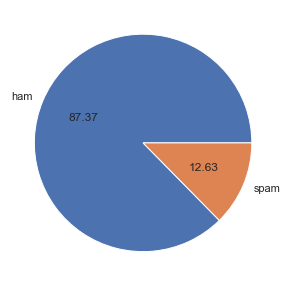

In [21]:
plt.figure(figsize=(15,5))
plt.pie(df.target.value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [22]:
## data is imbalance

In [23]:
## Deep analyisis
# 1. no of char in sms
# 2. no of words in sms
# 3. no of senetences in sms

In [24]:
import nltk

In [25]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [26]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ertar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### 1. no of char in sms

In [27]:
df['num_character']=df['text'].str.len()

In [28]:
df['num_character'][df['num_character'].isnull()]

1611   NaN
Name: num_character, dtype: float64

In [29]:
df.dropna(inplace = True)

In [30]:
df.isnull().sum()

target           0
text             0
num_character    0
dtype: int64

In [31]:
df.shape

(5168, 3)

In [32]:
df.dropna(inplace=True,axis=0)

In [33]:
df.shape

(5168, 3)

In [34]:
df['num_character']=df['num_character'].astype(int)

In [35]:
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### 2. no of words in sms

In [36]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


### 3. no of sentence in sms

In [38]:
df['num_sentances']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [39]:
df.head()

,target,text,num_character,num_words,num_sentances
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['num_character','num_words','num_sentances']].describe()

,num_character,num_words,num_sentances
count,5168.000000,5168.000000,5168.000000
mean,78.994969,18.456656,1.947368
std,58.235445,13.323870,1.362474
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [41]:
#ham message
df[df['target']==0][['num_character','num_words','num_sentances']].describe()

,num_character,num_words,num_sentances
count,4515.000000,4515.000000,4515.000000
mean,70.476855,17.124474,1.799779
std,56.359585,13.493086,1.278551
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [42]:
#spam message
df[df['target']==1][['num_character','num_words','num_sentances']].describe()

,num_character,num_words,num_sentances
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='num_character', ylabel='Count'>

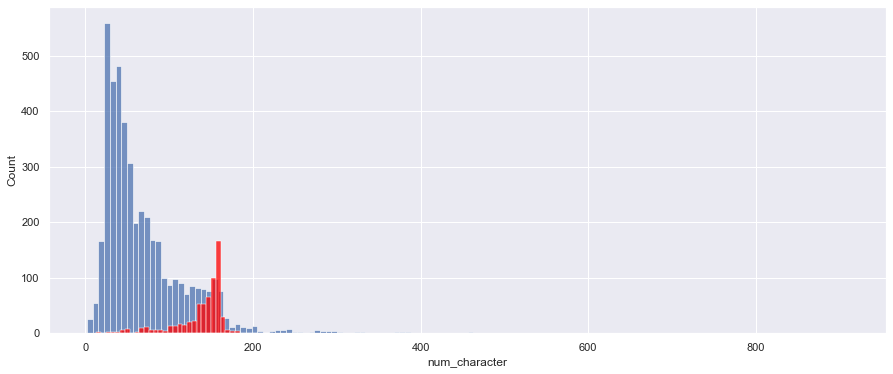

In [43]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

In [44]:
## maximum num of ham message are of low charcters

<AxesSubplot:xlabel='num_words', ylabel='Count'>

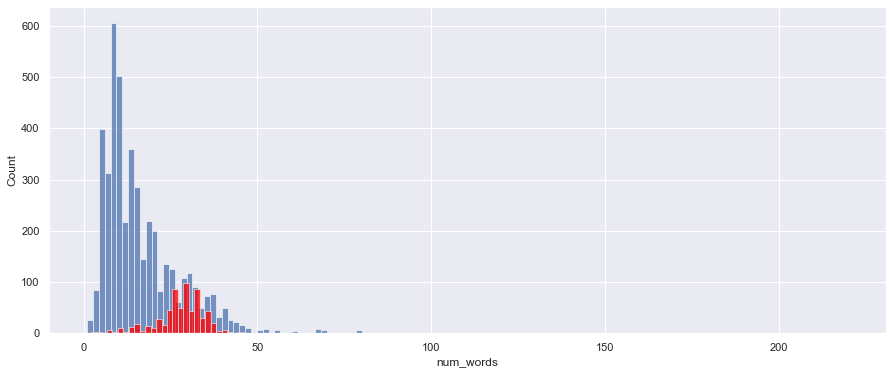

In [45]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<AxesSubplot:xlabel='num_sentances', ylabel='Count'>

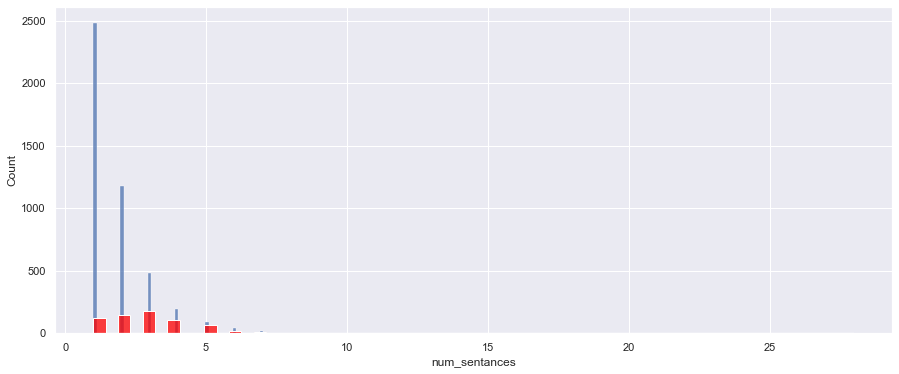

In [46]:
plt.figure(figsize=(15,6))

sns.histplot(df[df['target']==0]['num_sentances'])
sns.histplot(df[df['target']==1]['num_sentances'],color='red')

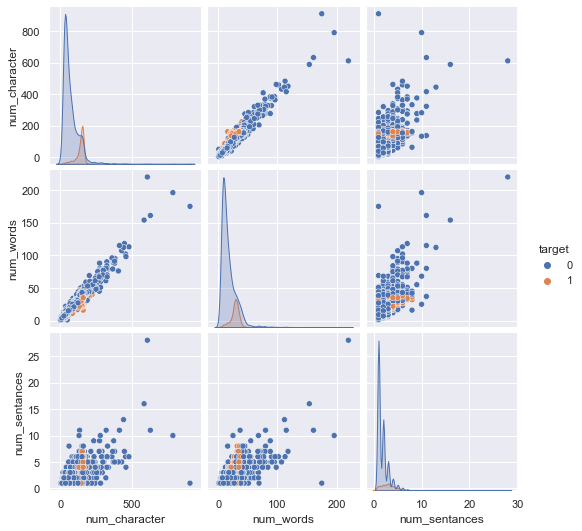

In [47]:
sns.pairplot(df,hue='target')
plt.show()

In [48]:
## data has outliers

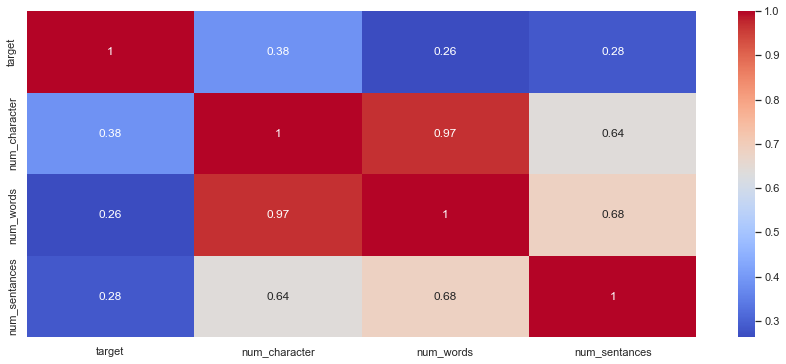

In [49]:
plt.figure(figsize=(15,6))

sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [50]:
# target and num_char has 0.38 , as num_char increases tendacy of of being spam increases
# senetece and char has high correlation and it is multicolinear
# we will keep num_char and drop others

## 3. Data preprocessing / text preprocessing
- lower case
- Tokenization
- Removing special charaters
- Removing stop words and puncutation
- stemming

In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ertar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [55]:
df.text[10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [56]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ertar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [59]:
df['transformed_text']=df['text'].apply(transform_text)

In [60]:
df.head()

,target,text,num_character,num_words,num_sentances,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [62]:
spam_wordcloud=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

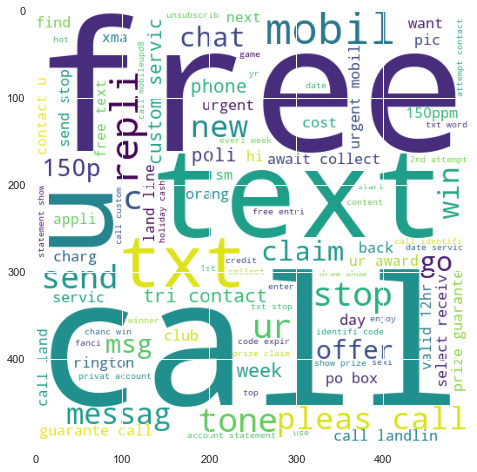

In [64]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wordcloud)

In [65]:
ham_wordcloud=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

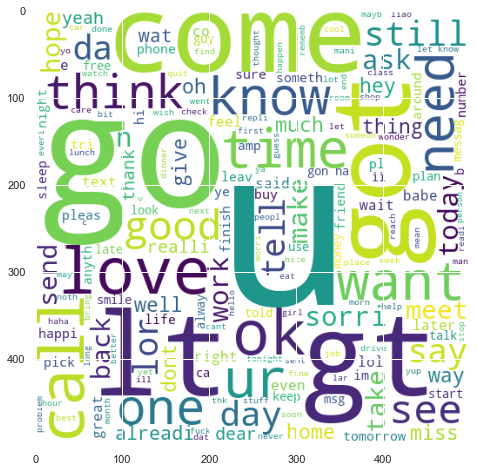

In [68]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wordcloud)

In [73]:
text_list=df[df['target']==1]['transformed_text'].tolist()
spam_corpus=[]

for msg in text_list:
    for word in msg.split():
        spam_corpus.append(word)
        

In [74]:
len(spam_corpus)

9939

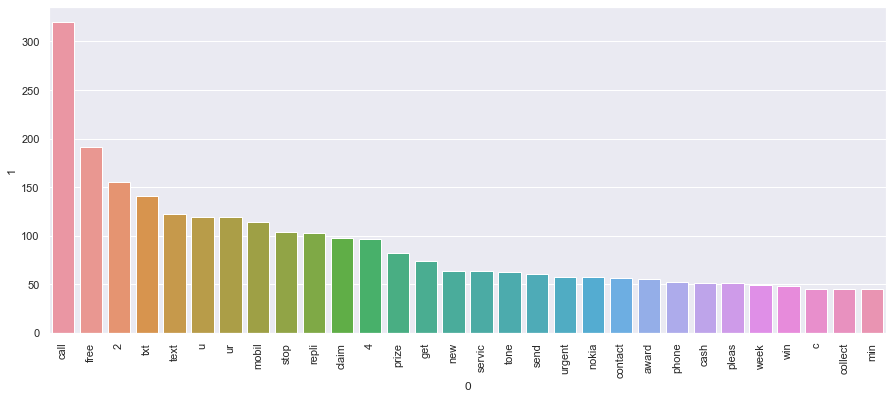

In [83]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [84]:
text_list=df[df['target']==0]['transformed_text'].tolist()
ham_corpus=[]

for msg in text_list:
    for word in msg.split():
        ham_corpus.append(word)

In [85]:
len(ham_corpus)

35391

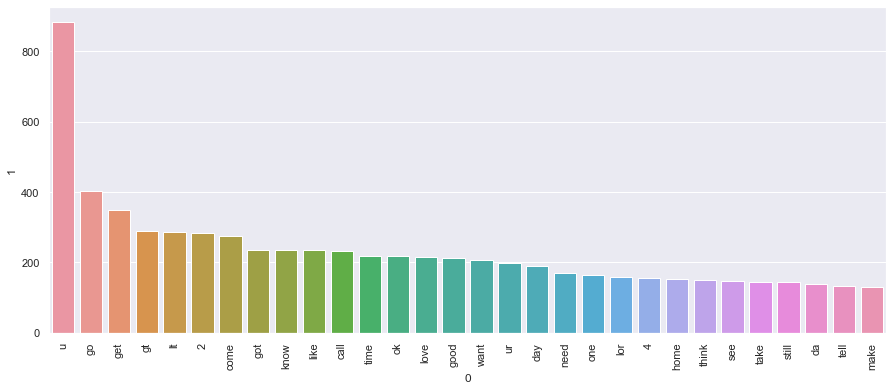

In [86]:
from collections import Counter
plt.figure(figsize=(15,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model building

In [193]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv=CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [194]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [195]:
X =tfidf.fit_transform(df['transformed_text']).toarray()

In [196]:
X.shape # sms,words

(5168, 3000)

In [197]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [198]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [199]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score
# false positive should be reduced

In [200]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [201]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print("\n",confusion_matrix(y_test , y_pred1))
print("\n",precision_score(y_test , y_pred1))

0.8723404255319149

 [[795 107]
 [ 25 107]]

 0.5


In [202]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print("\n",confusion_matrix(y_test , y_pred2))
print("\n",precision_score(y_test , y_pred2))

0.9729206963249516

 [[902   0]
 [ 28 104]]

 1.0


In [143]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print("\n",confusion_matrix(y_test , y_pred3))
print("\n",precision_score(y_test , y_pred3))

0.97678916827853

 [[899   3]
 [ 21 111]]

 0.9736842105263158


In [144]:
# tfidf >> mnb

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [146]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [147]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [148]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [149]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9814814814814815)

In [150]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9814814814814815
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8488372093023255
For  LR
Accuracy -  0.9477756286266924
Precision -  0.9148936170212766
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9902912621359223
For  AdaBoost
Accuracy -  0.9555125725338491
Precision -  0.9215686274509803
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8717948717948718
For  ETC
Accuracy -  0.9690522243713733
Precision -  0.9545454545454546
For  GBDT
Accuracy -  0.9429400386847195
Precision -  0.9195402298850575
For  xgb
Accuracy -  0.9622823984526112
Precision -  0.9514563106796117


In [165]:
performance_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [166]:
performance_df1

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.972921,1.000000
5,RF,0.970019,0.990291
0,SVC,0.972921,0.981481
8,ETC,0.969052,0.954545
10,xgb,0.962282,0.951456
6,AdaBoost,0.955513,0.921569
9,GBDT,0.942940,0.919540
4,LR,0.947776,0.914894
7,BgC,0.956480,0.871795


In [ ]:
## model impovement


In [158]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [159]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [168]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [169]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [171]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_num_chars,Precision_num_chars
0,KN,0.897485,1.000000,0.905222,1.000000
1,NB,0.955513,1.000000,0.972921,1.000000
2,RF,0.965184,1.000000,0.970019,0.990291
3,SVC,0.970019,0.971963,0.972921,0.981481
4,xgb,0.961315,0.942308,0.962282,0.951456
5,ETC,0.959381,0.941176,0.969052,0.954545
6,LR,0.945841,0.922222,0.947776,0.914894
7,AdaBoost,0.953578,0.911765,0.955513,0.921569
8,GBDT,0.944874,0.903226,0.942940,0.919540
9,BgC,0.956480,0.865546,0.956480,0.871795


In [163]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [164]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.897485,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.955513,1.000000,0.972921,1.000000,0.972921,1.000000,0.972921,1.000000
2,RF,0.965184,1.000000,0.970019,0.990291,0.970019,0.990291,0.970019,0.990291
3,SVC,0.970019,0.971963,0.972921,0.981481,0.972921,0.981481,0.972921,0.981481
4,xgb,0.961315,0.942308,0.962282,0.951456,0.962282,0.951456,0.962282,0.951456
5,ETC,0.959381,0.941176,0.969052,0.954545,0.969052,0.954545,0.969052,0.954545
6,LR,0.945841,0.922222,0.947776,0.914894,0.947776,0.914894,0.947776,0.914894
7,AdaBoost,0.953578,0.911765,0.955513,0.921569,0.955513,0.921569,0.955513,0.921569
8,GBDT,0.944874,0.903226,0.942940,0.919540,0.942940,0.919540,0.942940,0.919540
9,BgC,0.956480,0.865546,0.956480,0.871795,0.956480,0.871795,0.956480,0.871795


In [173]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [174]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [175]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [176]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 1.0


In [177]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [178]:
from sklearn.ensemble import StackingClassifier

In [179]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [180]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9586776859504132


In [203]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [1]:
import spacy